# Imports

In [103]:
!pip install --upgrade pyalgotrading

In [104]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [105]:
connection = AlgoBullsConnection()

In [106]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [107]:
API_TOKEN = "c3477e22990b004e542ac6eaee59d3cc961816f5"
connection.set_access_token(API_TOKEN)

Access token is valid.


#### NOTE: Before creating or executing the strategy, ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).![Reference](https://algobulls.github.io/pyalgotrading/python_build/imgs_v2/python_build_Oauth_successful.png)

# Strategy Creation

## Import Strategy from pyalgostrategypool

In [108]:
! wget -O obv_breakout_us.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/obv_breakout/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' obv_breakout_us.py

--2024-12-25 22:47:52--  https://raw.githubusercontent.com/Sriramg89/pyalgostrategypool/master/pyalgostrategypool/obv_breakout/_strategy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10696 (10K) [text/plain]
Saving to: 'obv_breakout_us.py'

obv_breakout_us.py  100%[===================>]  10.45K  --.-KB/s    in 0.008s  

2024-12-25 22:47:52 (1.35 MB/s) - 'obv_breakout_us.py' saved [10696/10696]

sed: 1: "obv_breakout_us.py": invalid command code o


In [109]:
from obv_breakout_us import OBVBreakoutStrategy as strategy_cls

In [110]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 160095,
 'strategyId': '7a06346007e447ac90722b5d9388d1f7'}

In [111]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [112]:
instrument = connection.search_instrument('TSLA', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:TSLA'

## Setup Parameters

In [113]:
parameters = {
    'OBV_MA_PERIOD': 10,           # hours (10 days)
    'LOOKBACK_PERIOD': 1,         # hours (10 days)
    'TRAILING_STOP_PERIOD': 10,    # hours (10 days)
    'ATR_PERIOD': 14,              # hours (14 days)
    'ATR_MULTIPLIER': 1            # (1.5)
}

In [114]:
initial_virtual_funds = 4000     # in dollars


## Backtesting

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [115]:
connection.backtest(
    strategy=strategy, 
    start='2020-08-01 09:15 -0400',  
    end='2022-07-31 15:30 -0400',    
    instrument='NASDAQ:TSLA', 
    lots=1,
    parameters=parameters, 
    candle='1 hour',                   
    initial_funds_virtual=initial_virtual_funds
)



Starting the strategy 'OBV Breakout' in BACKTESTING mode...
╒═════════════════════════╤══════════════════════════════╕
│ Config                  │ Value                        │
╞═════════════════════════╪══════════════════════════════╡
│ Strategy Name           │ OBV Breakout                 │
├─────────────────────────┼──────────────────────────────┤
│ Trading Type            │ BACKTESTING                  │
├─────────────────────────┼──────────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:TSLA']              │
├─────────────────────────┼──────────────────────────────┤
│ Quantity/Lots           │ 1                            │
├─────────────────────────┼──────────────────────────────┤
│ Start Timestamp         │ 2020-08-01 09:15:00-04:00    │
├─────────────────────────┼──────────────────────────────┤
│ End Timestamp           │ 2022-07-31 15:30:00-04:00    │
├─────────────────────────┼──────────────────────────────┤
│ Parameters              │ {'ATR_MULTIPLIER': 1,     

### Status

In [116]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [117]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (2)

In [118]:
print(logs)

[2024-12-25 22:48:09] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2024-12-25 22:48:09] Sanity checks on cfg successful.
[2024-12-25 22:48:09] Currency set to "USD"
[2024-12-25 22:48:09] Setting up broker connection...
[2024-12-25 22:48:10] Starting ALPACAV2 in PAPER mode...
[2024-12-25 22:48:11] Broker connection has been setup successfully.
[2024-12-25 22:48:11] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2024-12-25 22:48:11] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2024-12-25 22:48:11] Welcome ALGOBULLS VIRTUAL USER!
[2024-12-25 22:48:11] Reading strategy...
[2024-12-25 22:48:11] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2020-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...

          #####  #######    #    ######  ####### ### #     #  #####
         

### Stop

In [119]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [120]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NASDAQ,TSLA,2020-09-28 10:30:00-04:00,SELL,1,$,416.14,,2020-09-28 15:30:00-04:00,BUY,1,$,419.88,,-3.74,-3.74,0,-3.74
1,NASDAQ,TSLA,2020-10-09 09:30:00-04:00,SELL,1,$,430.13,,2020-10-09 15:30:00-04:00,BUY,1,$,433.00,,-2.87,-6.61,0,-2.87
2,NASDAQ,TSLA,2020-10-21 09:30:00-04:00,BUY,1,$,422.89,,2020-10-21 15:30:00-04:00,SELL,1,$,431.08,,8.19,1.58,0,8.19
3,NASDAQ,TSLA,2020-10-23 09:30:00-04:00,SELL,1,$,421.60,,2020-10-23 15:30:00-04:00,BUY,1,$,411.35,,10.25,11.83,0,10.25
4,NASDAQ,TSLA,2020-10-26 09:30:00-04:00,SELL,1,$,411.76,,2020-10-26 15:30:00-04:00,BUY,1,$,418.54,,-6.78,5.05,0,-6.78
5,NASDAQ,TSLA,2020-10-29 09:30:00-04:00,BUY,1,$,409.91,,2020-10-29 15:30:00-04:00,SELL,1,$,413.91,,4.00,9.05,0,4.00
6,NASDAQ,TSLA,2020-11-04 09:30:00-04:00,BUY,1,$,437.00,,2020-11-04 15:30:00-04:00,SELL,1,$,422.50,,-14.50,-5.45,0,-14.50
7,NASDAQ,TSLA,2020-11-20 12:30:00-04:00,SELL,1,$,493.74,,2020-11-20 15:30:00-04:00,BUY,1,$,493.74,,0.00,-5.45,0,0.00
8,NASDAQ,TSLA,2020-11-24 10:30:00-04:00,SELL,1,$,540.42,,2020-11-24 15:30:00-04:00,BUY,1,$,546.49,,-6.07,-11.52,0,-6.07
9,NASDAQ,TSLA,2020-11-25 12:30:00-04:00,BUY,1,$,554.99,,2020-11-25 15:30:00-04:00,SELL,1,$,554.99,,0.00,-11.52,0,0.00


## Statistics Reports

### Statistics

In [121]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/Users/sriram/anaconda3/lib/python3.9/site-packages/pyalgotrading/algobulls/connection.py:622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Start Period        2020-09-28
End Period          2022-05-05
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   26,127,439,953,323,173,126,660,294,857,843,354,669,319,653,512,511,795,672,400,172,562,136,718,515,469,436,402,582,782,670,888,383,149,500,193,706,899,864,672,423,211,030,692,187,649,081,344.00%
CAGR﹪              0.18%

Sharpe              0.39
Prob. Sharpe Ratio  55.88%
Sortino             0.56
Sortino/√2          0.4
Omega               1.08

Max Drawdown        -2.25%
Longest DD Days     542

Gain/Pain Ratio     0.08
Gain/Pain (1M)      0.15

Payoff Ratio        1.14
Profit Factor       -
Common Sense Ratio  1.23
CPC Index           0.6
Tail Ratio          1.02
Outlier Win Ratio   1.01
Outlier Loss Ratio  -

M

### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/Users/sriram/anaconda3/lib/python3.9/site-packages/pyalgotrading/algobulls/connection.py:622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2020-09-28
End Period                 2022-05-05
Risk-Free Rate             0.0%
Time in Market             90.0%

Cumulative Return          0.41%
CAGR﹪                     0.18%

Sharpe                     0.39
Prob. Sharpe Ratio         55.94%
Smart Sharpe               0.37
Sortino                    0.56
Smart Sortino              0.54
Sortino/√2                 0.4
Smart Sortino/√2           0.38
Omega                      1.08

Max Drawdown               -2.25%
Longest DD Days            542
Volatility (ann.)          7.68%
Calmar                     0.08
Skew                       -0.04
Kurtosis                   2.99

Expected Daily %           0.01%
Expected Monthly %         0.02%
Expected Yearly %          0.14%
Kelly Criterion            3.63%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.78%
Expected Shortfall (cVaR)  -0.78%

Max Consecutive Wins       5
Ma

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-10-26,2021-11-22,2022-04-20,542,-2.250345,-1.708198
2,2020-10-09,2020-10-09,2020-10-09,1,-0.071817,NaN


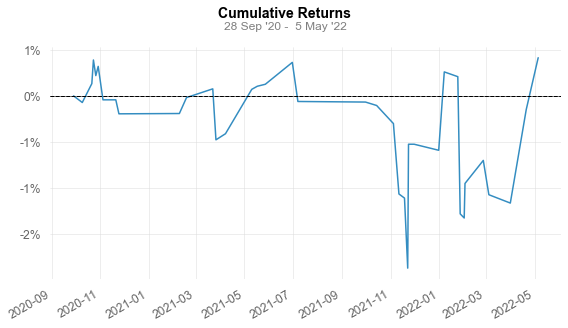

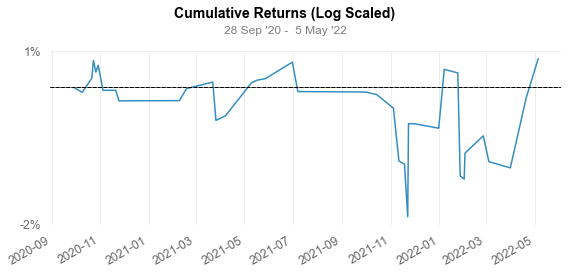

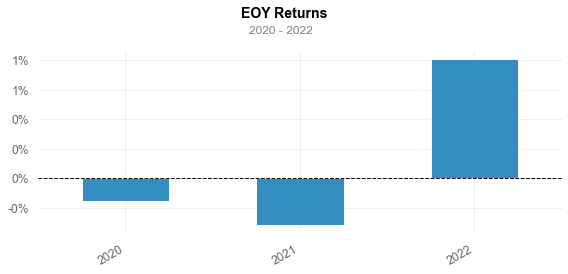

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

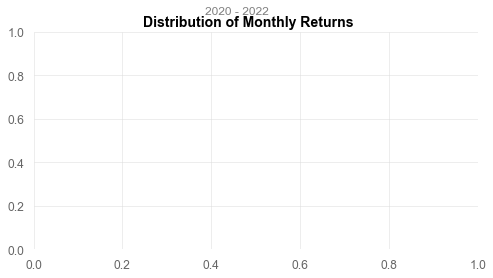

In [122]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True)

## Order History

In [ ]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

## Papertrading

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [123]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:TSLA', 
    lots=1,
    parameters=parameters, 
    candle='60minutes'
)


Starting the strategy 'OBV Breakout' in PAPERTRADING mode...
╒═════════════════════════╤══════════════════════════════╕
│ Config                  │ Value                        │
╞═════════════════════════╪══════════════════════════════╡
│ Strategy Name           │ OBV Breakout                 │
├─────────────────────────┼──────────────────────────────┤
│ Trading Type            │ PAPERTRADING                 │
├─────────────────────────┼──────────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:TSLA']              │
├─────────────────────────┼──────────────────────────────┤
│ Quantity/Lots           │ 1                            │
├─────────────────────────┼──────────────────────────────┤
│ Start Timestamp         │ 2024-12-25 09:15:00-04:00    │
├─────────────────────────┼──────────────────────────────┤
│ End Timestamp           │ 2024-12-25 15:00:00-04:00    │
├─────────────────────────┼──────────────────────────────┤
│ Parameters              │ {'ATR_MULTIPLIER': 1,    

### Status

In [124]:
connection.get_papertrading_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [125]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

KeyError: '60 Minutes'

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [ ]:
broking_details = {
    'brokerName': 'ALPACA LIVE',
    'credentialParameters': {}
}

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:TSLA', 
    lots=5,
    parameters=parameters, 
    candle='60minutes',
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)